In [51]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

df = pd.read_csv("csvs/heart.csv")

columns = df.columns[:13]
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [52]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


## Error Plot

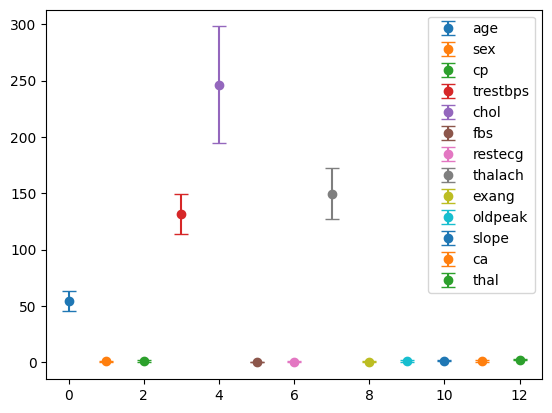

In [53]:
for i, column in enumerate(columns):
    column_mean = df[column].mean()
    column_std = df[column].std()

    plt.errorbar(i, column_mean, yerr=column_std, fmt='o', label=column, capsize=5)
    plt.legend()

## Heatmap

<Axes: >

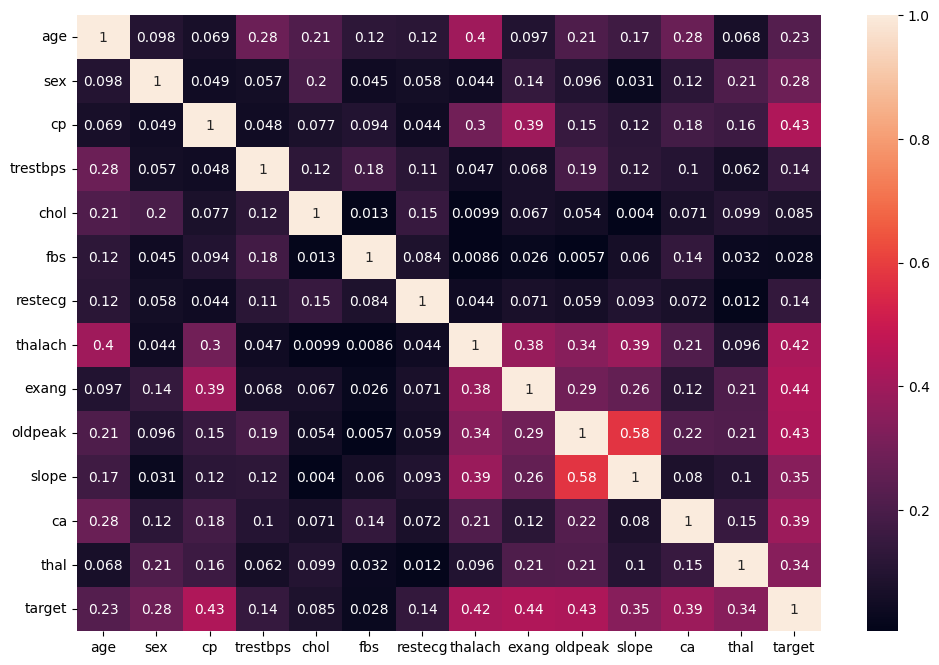

In [54]:
plt.figure(figsize=(12, 8))
sns.heatmap(abs(df.corr()), annot=True)

In [55]:
abs(df.corr()['target']).sort_values(ascending=False)

target      1.000000
exang       0.436757
cp          0.433798
oldpeak     0.430696
thalach     0.421741
ca          0.391724
slope       0.345877
thal        0.344029
sex         0.280937
age         0.225439
trestbps    0.144931
restecg     0.137230
chol        0.085239
fbs         0.028046
Name: target, dtype: float64

## Histograms

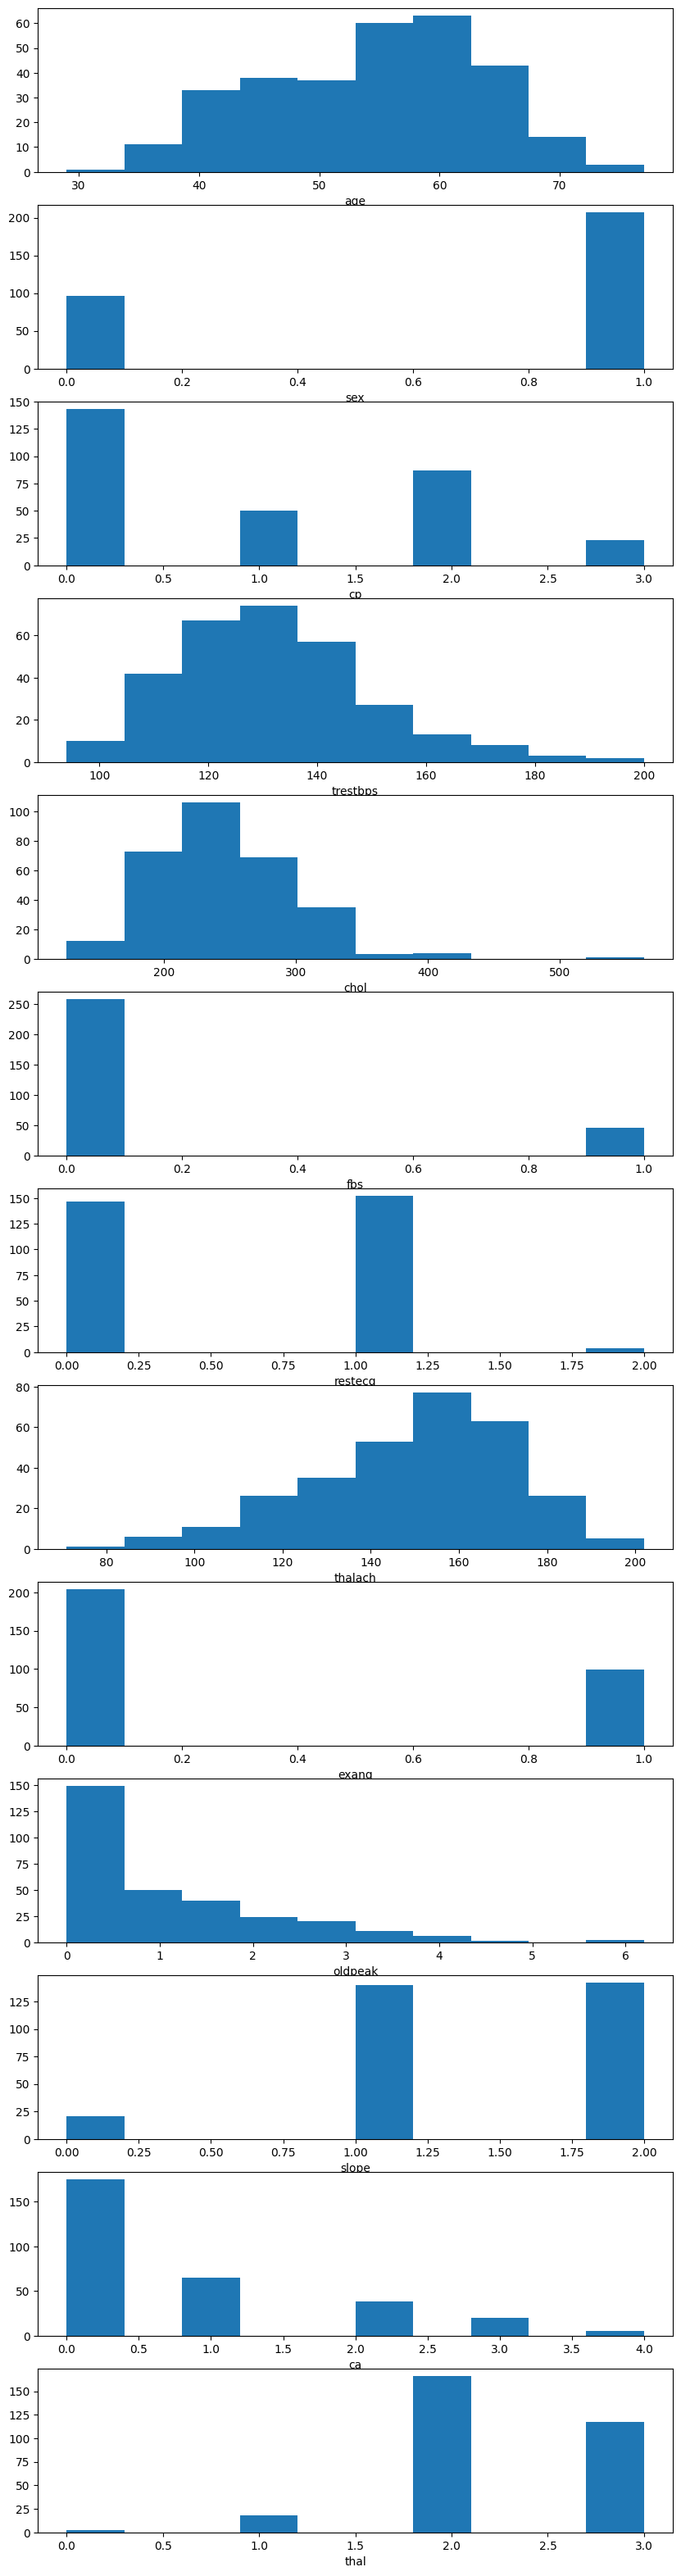

In [56]:
fig, axs = plt.subplots(13, figsize=(10, 40))
for i, column in enumerate(columns):
    axs[i].hist(df[column])
    axs[i].set_xlabel(column)

## KDE Plots

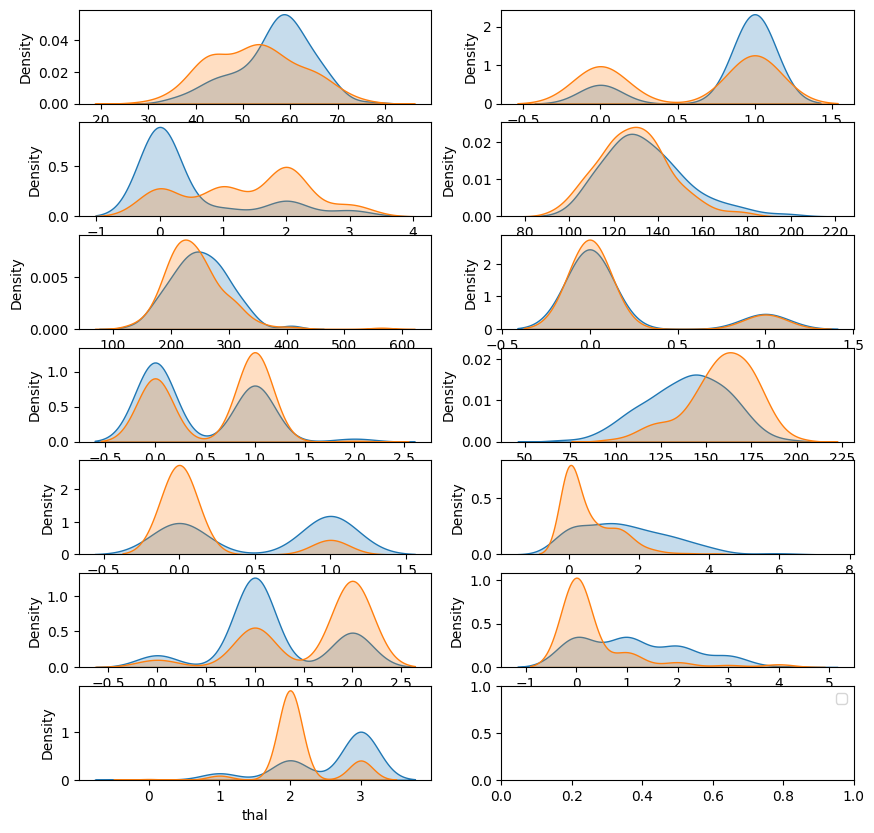

In [ ]:
fig, axes = plt.subplots(7, 2, figsize=(10, 10))

for i, column in enumerate(columns):
    row, col = i // 2, i % 2

    with sns.axes_style("whitegrid"):
        sns.kdeplot(df.loc[df['target'] == 0, column], label='No Heart Desiese', shade=True, ax = axes[row, col])
        sns.kdeplot(df.loc[df['target'] == 1, column], label='Heart Disease', shade=True, ax=axes[row, col])
        plt.legend()

## 3D KDE Plots

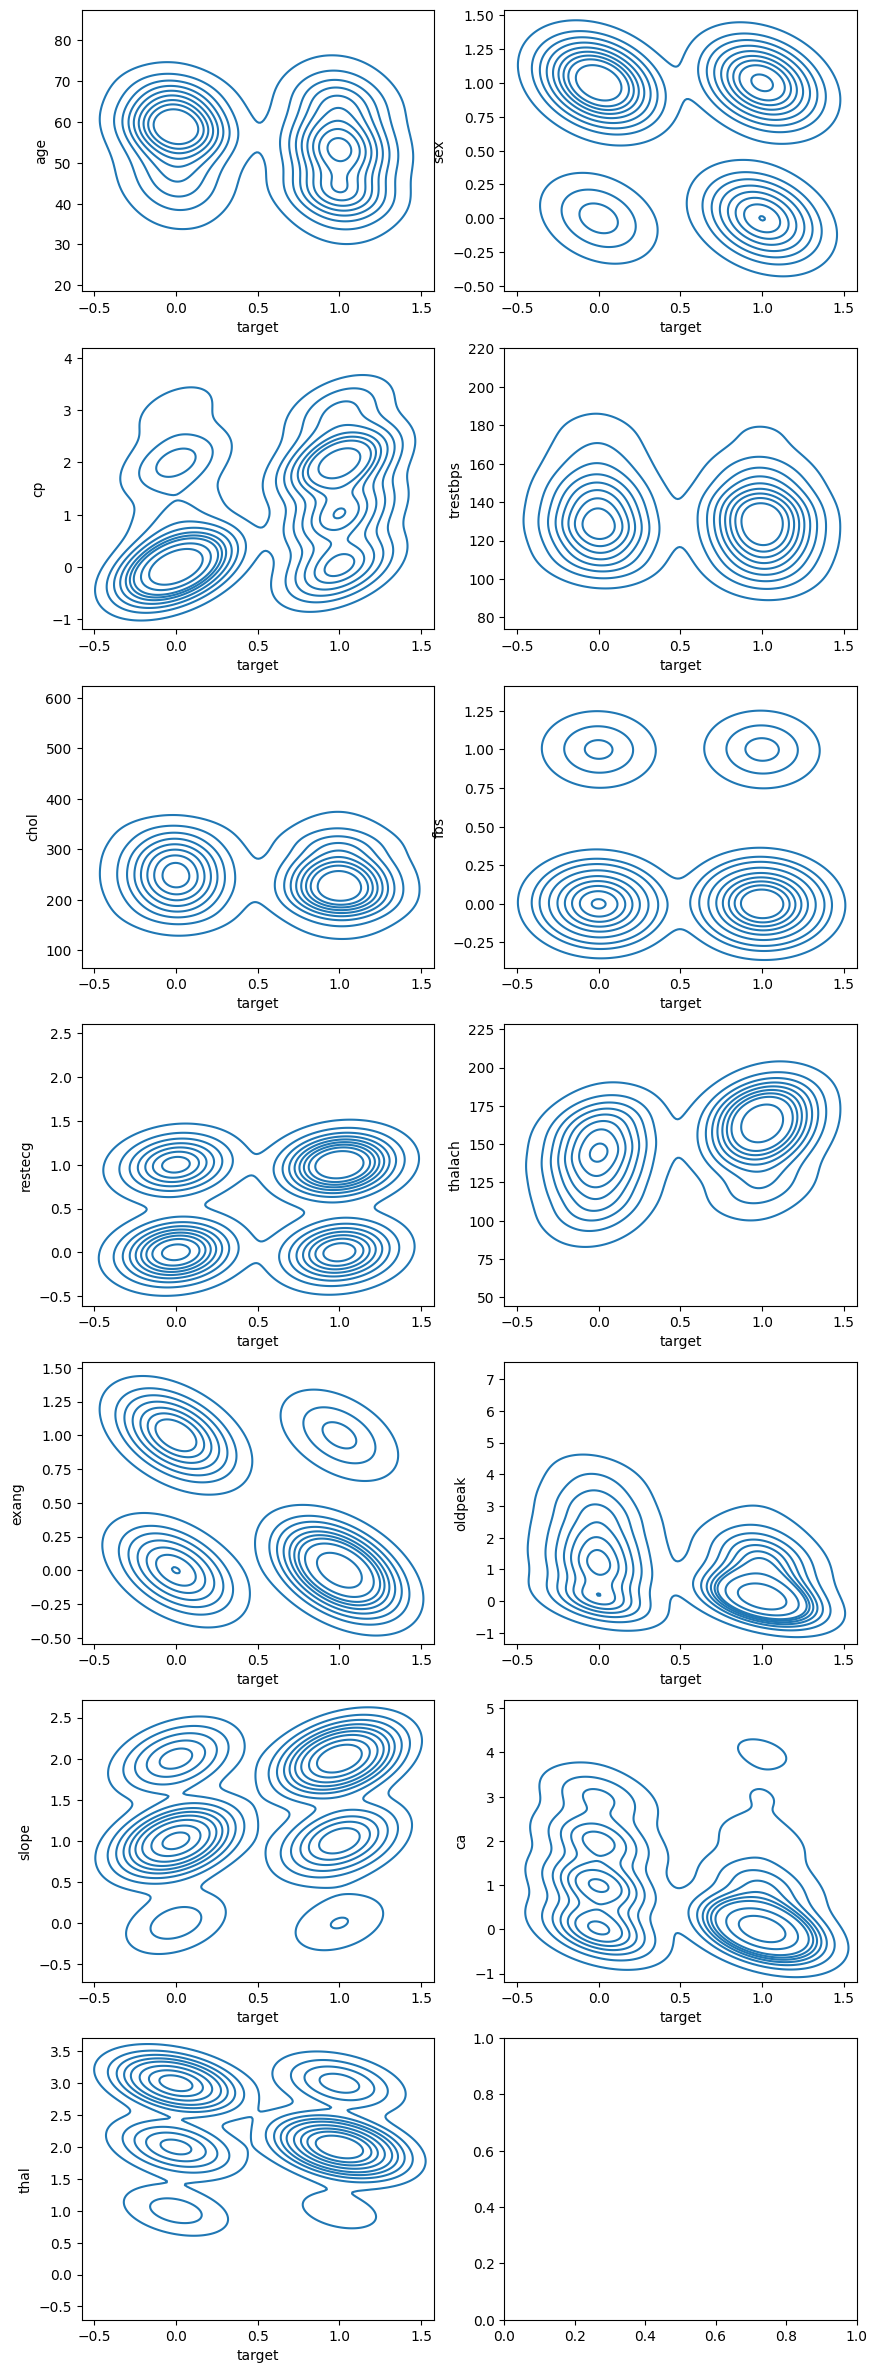

In [71]:
fig, axes = plt.subplots(7, 2, figsize=(10, 30))

for i, column in enumerate(columns):
    row, col = i // 2, i % 2

    with sns.axes_style("darkgrid"):
        sns.kdeplot(data=df, x="target", y=column, ax=axes[row, col])
        